In [2]:
# example notebook

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadroshaanriaz/students-performance-dataset-cleaned")
path

/home/manu/prog/ai/kaggle-student/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/home/manu/.cache/kagglehub/datasets/muhammadroshaanriaz/students-performance-dataset-cleaned/versions/1'

In [4]:
import pandas as pd

df = pd.read_csv(f'{path}/Cleaned_Students_Performance.csv')

In [5]:
df['race_ethnicity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: race_ethnicity
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
df['race_ethnicity'].unique(), df['parental_level_of_education'].unique() 

(array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object))

In [7]:
from pandas import CategoricalDtype

race_ethnicities = CategoricalDtype(categories=['group A', 'group B', 'group C', 'group D', 'group E'], ordered=True)
df['race_ethnicity'] = df['race_ethnicity'].astype(race_ethnicities)
education_levels = CategoricalDtype(categories=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"], ordered=True)
df['parental_level_of_education'] = df['parental_level_of_education'].astype(education_levels)
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


In [8]:
df.describe()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [9]:
from fastai.data.transforms import RandomSplitter
from fastai.tabular.core import cont_cat_split, Categorify, TabularPandas

procs = [Categorify]
dep_var=['math_score', 'reading_score', 'writing_score']

to = TabularPandas(df, procs, ['race_ethnicity', 'parental_level_of_education'], ['gender', 'lunch', 'test_preparation_course'], y_names=['average_score'], splits=RandomSplitter()(range(len(df))))
to.show(10)

,race_ethnicity,parental_level_of_education,gender,lunch,test_preparation_course,average_score
5,group B,associate's degree,0,1,0,77.333336
728,group D,high school,0,0,0,83.000000
805,group A,some college,1,0,0,76.666664
807,group E,high school,0,0,0,42.000000
663,group C,high school,0,1,0,67.000000
964,group D,some college,1,1,0,62.333332
966,group A,some high school,1,1,1,66.000000
900,group D,master's degree,1,1,0,86.000000
372,group D,some high school,1,1,0,73.333336
61,group A,some high school,1,0,0,37.333332


In [10]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
valid_xs.describe()

,race_ethnicity,parental_level_of_education,gender,lunch,test_preparation_course
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.200000,3.015000,0.485000,0.680000,0.400000
std,1.125314,1.495311,0.501029,0.467647,0.491127
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,0.000000,1.000000,0.000000
75%,4.000000,4.000000,1.000000,1.000000,1.000000
max,5.000000,6.000000,1.000000,1.000000,1.000000


In [11]:
from sklearn.tree import DecisionTreeRegressor

m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

IndexError: list index out of range

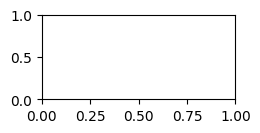

In [13]:
import dtreeviz
import numpy as np


d = dtreeviz.model(m, xs, y, xs.columns, dep_var)
d.view()